# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

#  This is creating  recommender systems for incognito search. It is done for learning purposes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#used to recomand movies to everyone that we don't have data used to  recommended for new search 
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [3]:
#used to show the first top rated five raws of movies for new search so we can recomand it to everyone
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#used to show the first five raws of rating
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
#This is used to group by the rating in descending order 
ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False)

,userId,rating,timestamp
movieId,,,
318,95829,1404.0,376924839127
356,101385,1370.0,386165236681
296,90621,1288.5,349204311001
2571,85236,1165.5,350270041779
593,85535,1161.0,320035674330
...,...,...,...
160872,21,0.5,1468113939
8236,580,0.5,1167791433
57326,232,0.5,1241823595


In [6]:
#used to make the movieId as index
movies.set_index('movieId', inplace=True)

In [7]:
top_idx = ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False).index
movies.loc[top_idx]

,title,genres
movieId,,
318,"Shawshank Redemption, The (1994)",Crime|Drama
356,Forrest Gump (1994),Comedy|Drama|Romance|War
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
...,...,...
160872,Satanic (2016),Horror
8236,While the City Sleeps (1956),Drama|Film-Noir
57326,In the Name of the King: A Dungeon Siege Tale ...,Action|Adventure|Fantasy


In [8]:
pd.concat([movies, ratings.groupby('movieId').sum()], axis=1).sort_values(by='rating', ascending=False)

,title,genres,userId,rating,timestamp
movieId,,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,95829.0,1404.0,3.769248e+11
356,Forrest Gump (1994),Comedy|Drama|Romance|War,101385.0,1370.0,3.861652e+11
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,90621.0,1288.5,3.492043e+11
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,85236.0,1165.5,3.502700e+11
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN,NaN


In [9]:
#Check this if there is reptition
#used to sort the movies by the movieID by thier rating from descending order. 
top_idx = ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False).index
movies.loc[top_idx]

,title,genres
movieId,,
318,"Shawshank Redemption, The (1994)",Crime|Drama
356,Forrest Gump (1994),Comedy|Drama|Romance|War
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
...,...,...
160872,Satanic (2016),Horror
8236,While the City Sleeps (1956),Drama|Film-Noir
57326,In the Name of the King: A Dungeon Siege Tale ...,Action|Adventure|Fantasy


# Creating a simple collaborative filtering recommender for user 2 done for learning purposes   

In [10]:
# This is used to create the matrix by making rows(index) as userID and columns movieID and the entry value is rating. 

wide = ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#using wide and transpose(switching raw and column)  we use to find similar users calculate correlation between users

cor = wide.T.corr()

In [12]:
#used to see the top 5 raws
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,2.719480e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


In [13]:
#using the  user 2 and sort the value in the order of descending
#This is to see which users rated the movies with the same ratings
#because of the missing Values Pearson correlation is not useful in this kind of setuation(when missing value exist)
cor.loc[2].sort_values(ascending=False)

userId
2      1.0
341    1.0
93     1.0
143    1.0
148    1.0
      ... 
602    NaN
604    NaN
605    NaN
607    NaN
609    NaN
Name: 2, Length: 610, dtype: float64

In [14]:
#used to see  if user 2 and user 341 rated the same movies without the missing values 
wide.loc[2].notna().equals(wide.loc[341].notna())

False

# Assignment 6

# The number of movies that are watched by user 2

In [15]:
# These are the number of movies that are watched by user 2 a total of 29 movies
rated_by_2=(wide.loc[2]>=1)
print(wide.loc[2][rated_by_2])


movieId
318       3.0
333       4.0
1704      4.5
3578      4.0
6874      4.0
8798      3.5
46970     4.0
48516     4.0
58559     4.5
60756     5.0
68157     4.5
71535     3.0
74458     4.0
77455     3.0
79132     4.0
80489     4.5
80906     5.0
86345     4.0
89774     5.0
91529     3.5
91658     2.5
99114     3.5
106782    5.0
109487    3.0
112552    4.0
114060    2.0
115713    3.5
122882    5.0
131724    5.0
Name: 2, dtype: float64


# This is the bar chart

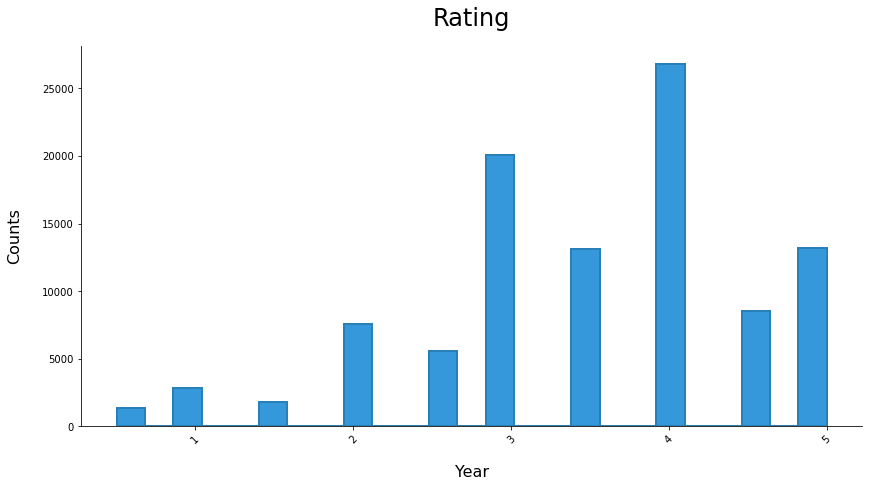

In [16]:
# point two of the rubric I used git hub to find the code
data = pd.merge(left=movies, right=ratings, on='movieId')

def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if attribute == 'rating':
        dataset = dataset[dataset['rating'] != 9999]
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
make_histogram(data, 'rating', title='Rating', xlab='Year', ylab='Counts')


# Top rated movies by user 2 with  a rating of 5 with thier movieId and descriptions

In [17]:
# point three on rubric This are the movie that are watched by user 2 with a rating of 5
rated_5_by_2 = (wide.loc[2] == 5)
print(wide.loc[2][rated_5_by_2])

movieId
60756     5.0
80906     5.0
89774     5.0
106782    5.0
122882    5.0
131724    5.0
Name: 2, dtype: float64


In [18]:
movies.loc[60756]

title     Step Brothers (2008)
genres                  Comedy
Name: 60756, dtype: object

In [19]:
movies.loc[80906]

title     Inside Job (2010)
genres          Documentary
Name: 80906, dtype: object

In [20]:
movies.loc[89774]

title     Warrior (2011)
genres             Drama
Name: 89774, dtype: object

In [21]:
movies.loc[106782]

title     Wolf of Wall Street, The (2013)
genres                 Comedy|Crime|Drama
Name: 106782, dtype: object

In [22]:
movies.loc[122882]

title            Mad Max: Fury Road (2015)
genres    Action|Adventure|Sci-Fi|Thriller
Name: 122882, dtype: object

In [23]:
movies.loc[131724]

title     The Jinx: The Life and Deaths of Robert Durst ...
genres                                          Documentary
Name: 131724, dtype: object

# Euclidean distance to calculate similarities

In [24]:

from scipy.spatial.distance import euclidean

In [25]:
# in order to use Euclidean we must fill the missing value with -1 to avoid missing values 
wide.fillna(-1, inplace=True)

In [26]:
euclidean(wide.iloc[1], wide.iloc[341])

42.429353047153576

In [27]:
from scipy.spatial.distance import pdist, squareform

In [28]:
euclidean_distances = squareform(pdist(wide, metric=euclidean))

In [29]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [30]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


In [31]:
# based on the Euclidean distanc the next similar user is 442,461,189,508 and so on 
#442 has s an Ecludian distance of 29.0 comparing 

euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

In [32]:
#These are the top recommandation for user 2 
rated_5_by_461_not_watched_by_2 = (wide.loc[461] ==5) & (wide.loc[2]==-1)
print(wide.loc[2][rated_5_by_461_not_watched_by_2])
print(wide.loc[461][rated_5_by_461_not_watched_by_2])

movieId
356   -1.0
Name: 2, dtype: float64
movieId
356    5.0
Name: 461, dtype: float64


In [33]:
movies.loc[356]

title          Forrest Gump (1994)
genres    Comedy|Drama|Romance|War
Name: 356, dtype: object

# Cosine distances to calculate similarities

In [34]:
from scipy.spatial.distance import cosine

In [35]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

In [36]:
# used to show that using cosine user 341 is no the closest to user 2

cosine_df.loc[2].sort_values().loc[461]

0.0460587034463541

In [37]:
#These are the top recommandation for user 2 
rated_5_by_461_not_watched_by_2 = (wide.loc[461] ==5) & (wide.loc[2]==-1)
print(wide.loc[2][rated_5_by_461_not_watched_by_2])
print(wide.loc[461][rated_5_by_461_not_watched_by_2])

movieId
356   -1.0
Name: 2, dtype: float64
movieId
356    5.0
Name: 461, dtype: float64


In [38]:
movies.loc[356]

title          Forrest Gump (1994)
genres    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [39]:
#These are top rated movies by user 461
top_rated_by_461=(wide.loc[461]==5)
print(wide.loc[461][top_rated_by_461])

movieId
356       5.0
106782    5.0
Name: 461, dtype: float64


# Analysis/Summary

For both parts of the assignment, write a short analysis and summary of what you did, the results, and the significance. Do this in a markdown cell here at the bottom, like this one.    E


if there are different scale when we compare the two users rating then ue will use cosine. however if there are points on the same line then we use Ecludian.Based on the abave results The users listed above such as user 341,93,143 and 148 are found that the rated the exact same movie with the exact same rateing . the result also showd that there are a lot of missing data . In addition this result shows that Pearson correlation might not be the perfict choise for this kind of problems







